
    1.Название работы: Линейная фильтрация

    2.Цель:изучить воздействие ФНЧ на тестовый сигнал с шумом.

    3.Постановка задачи:
        Сгенерировать гармонический сигнал с шумом
        и синтезировать ФНЧ. Получить сигнал во временной и частотной
        областях до и после фильтрации. Сделать выводы о воздействии
        ФНЧ на спектр сигнала.

    4.Теоритический раздел
            Фильтр нижних частот (ФНЧ) — электронный или любой другой фильтр,
        эффективно пропускающий частотный спектр сигнала ниже некоторой частоты (частоты среза)
        и подавляющий частоты сигнала выше этой частоты.
            Степень подавления каждой частоты зависит от вида фильтра.
            Идеальный фильтр нижних частот (sinc-фильтр) полностью подавляет все частоты входного
        сигнала выше частоты среза и пропускает без изменений все частоты ниже частоты среза.
        Переходной зоны между частотами полосы подавления и полосы пропускания не существует.
        Идеальный фильтр нижн

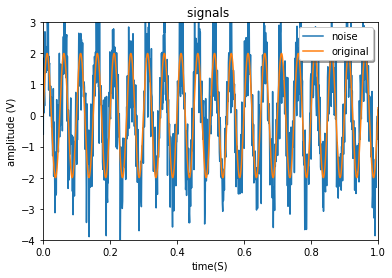

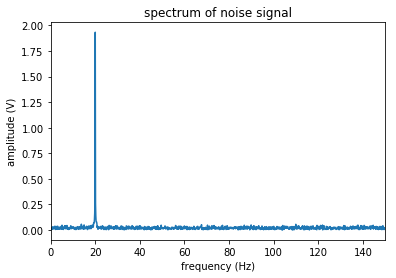

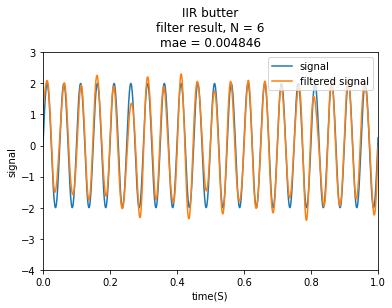

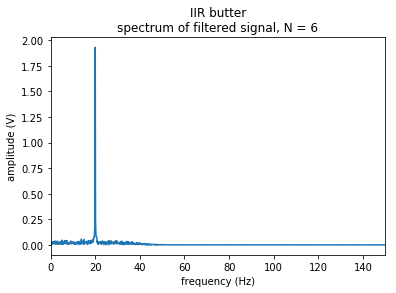

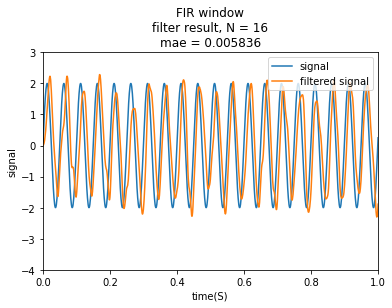

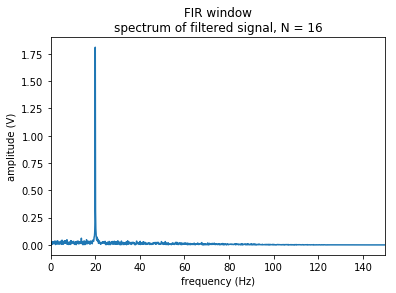


    6.Выводы:
        В данной работе была произведенна фильтрация сигнала КИХ и БИХ фильтрами.
        Оба результат фильтрации очень близки к исходному сигналу, но меньшую абсолютную ошибку
    обеспечил БИХ-фильтр.
        На граффике, иллюстрирующем спектры видно, что шумов стало меньше, особенно в области высоких частот.

    


In [4]:
from __future__ import print_function
import sys
sys.path.append("../..") 
from Telecom.my_telecom import *
from timeit import default_timer as timer

print(lab3_theory.__doc__)

# ----------------------------- Parameters of signals ------------------------------
sig_freq = 20  # frequency of original signal
T = 1.0 / sig_freq
ampl = 2  # amplitude of original signal
fs = 1000  # sampling rate
ts = 1.0 / fs  # sampling interval
n = 1 << 13  # number of fft points, pick power of 2

t = np.arange(0, n * ts, step=ts)  # time vector

sig = ampl * np.sin(2 * np.pi * sig_freq * t)

# --------------------- noise signal calculating & plotting ------------------------
sig_noise = sig + np.random.randn(len(sig))

plot_graphic(
    x=t[:int((n - 1) / 2)], y=sig_noise[:int((n - 1) / 2)],
    x_label='time(S)', y_label='amplitude (V)',
    xlim=[0, 1], ylim=[-4, 3],
    show=False
)

plot_graphic(
    x=t[:int((n - 1) / 2)], y=sig[:int((n - 1) / 2)],
    title='signals ',
    x_label='time(S)', y_label='amplitude (V)',
    xlim=[0, 1], ylim=[-4, 3],
    show=False
)
plt.legend(('noise', 'original'), loc='upper right', shadow=True)
plt.show()

# ---------------------- noise signal spectrum -------------------------------
fft_freq = np.fft.fftfreq(n, ts)  # discrete Fourier Transform frequencies
sig_fft = np.fft.fft(sig_noise) / n * 2  # discrete Fourier Transform ( / n * 2 - normalization)

plot_graphic(
    x=fft_freq[:int((n - 1) / 2)], y=abs(sig_fft)[:int((n - 1) / 2)],
    title='spectrum of noise signal',
    x_label='frequency (Hz)', y_label='amplitude (V)',
    xlim=[0, 150],
    show=True
)

# IIR params
nyq = 0.5 * fs  # Nyquist freequency
Wn = 2 * sig_freq / nyq
N = 6

# calculate & compare filters
for filt_func in [signal.butter, signal.firwin]:

    # ---------------- create filter ------------------------
    if filt_func == signal.butter:  # IIR
        N = 6
        fnum, fdenom = filt_func(N=N, Wn=Wn)
        filtered = signal.filtfilt(fnum, fdenom, sig_noise)
        name = 'IIR butter'

    elif filt_func == signal.firwin:  # FIR
        N = int(N * 2.7)
        low_filter = filt_func(numtaps=N, cutoff=sig_freq, fs=fs)
        filtered = signal.convolve(sig_noise, low_filter)
        name = 'FIR window'

    mae = np.abs((sig - filtered[0:n]).mean())

    # --------------- plot source & filtred signal --------------------
    plot_graphic(
        x=t[:int((n - 1) / 2)], y=sig[:int((n - 1) / 2)],
        x_label='time(S)', y_label='signal',
        xlim=[0, 1], ylim=[-4, 3],
        show=False)

    plot_graphic(
        x=t[:int((n - 1) / 2)], y=filtered[:int((n - 1) / 2)],
        title='%s\nfilter result, N = %d\nmae = %f' % (name, N, mae),
        x_label='time(S)', y_label='signal',
        xlim=[0, 1], ylim=[-4, 3],
        show=False)

    plt.legend(('signal', 'filtered signal'), loc='upper right', shadow=False)
    plt.show()

    # ---------------- calculate & plot spectrum ---------------------------
    fft_freq = np.fft.fftfreq(n, ts)  # discrete Fourier Transform frequencies
    sig_fft = np.fft.fft(filtered) / n * 2  # discrete Fourier Transform ( / n * 2 - normalization)

    plot_graphic(
        x=fft_freq[:int((n - 1) / 2)], y=abs(sig_fft)[:int((n - 1) / 2)],
        title='%s\nspectrum of filtered signal, N = %d' % (name, N),
        x_label='frequency (Hz)', y_label='amplitude (V)',
        xlim=[0, 150],
        show=True
    )

print(lab3_conclusion.__doc__)